<a href="https://colab.research.google.com/github/njiririkinyanjui/Supervised_-_Unsupervised_Learning_R/blob/main/AdvertisingWork_Supervised_Learning_Using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Research Question**

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads.

Using the Male column wich individual is moree likely to visit the site

* Problem Definition
* Data Sourcing
* Check the Data
* Perform Data Cleaning
* Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
* Clustering K-Means & Hierarchial clustering
* Implement the Solution ( Supervised Learning)
* Challenge the Solution
* Follow up Questions

# **Loading the dataset and Previewing**

## Loading the dataset

In [1]:
# Loading the relevant libraries

install.packages('tidyverse')
library(tidyverse)

install.packages('ggplot2')
library(ggplot2)

install.packages('psych')
library(psych)

install.packages('Amelia')
library(Amelia)

install.packages('GGally')
library(GGally)

install.packages('rpart')
library(rpart)

install.packages('randomForest')
library(randomForest)

library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppArmadillo’


Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## 

In [2]:
# Reading the dataset

df <- read_csv("/content/advertising.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  `Daily Time Spent on Site` = col_double(),
  Age = col_double(),
  `Area Income` = col_double(),
  `Daily Internet Usage` = col_double(),
  `Ad Topic Line` = col_character(),
  City = col_character(),
  Male = col_double(),
  Country = col_character(),
  Timestamp = col_datetime(format = ""),
  `Clicked on Ad` = col_double()
)




In [3]:
# Looking at the structure of our data

str(df)

tibble [1,000 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Daily Time Spent on Site: num [1:1000] 69 80.2 69.5 74.2 68.4 ...
 $ Age                     : num [1:1000] 35 31 26 29 35 23 33 48 30 20 ...
 $ Area Income             : num [1:1000] 61834 68442 59786 54806 73890 ...
 $ Daily Internet Usage    : num [1:1000] 256 194 236 246 226 ...
 $ Ad Topic Line           : chr [1:1000] "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr [1:1000] "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : num [1:1000] 0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr [1:1000] "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : POSIXct[1:1000], format: "2016-03-27 00:53:11" "2016-04-04 01:39:02" ...
 $ Clicked on Ad           : num [1:1000] 0 0 0 0 0 0 0 1 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   `

In [4]:
# This function is the dplyr-alternative to the well-known str function for base R, 
# and is thus helpful for a first inspection of the data set at hand.

glimpse(df)

# our datset has 1000 rows and 10 columns

Rows: 1,000
Columns: 10
$ `Daily Time Spent on Site` <dbl> 68.95, 80.23, 69.47, 74.15, 68.37, 59.99, …
$ Age                        <dbl> 35, 31, 26, 29, 35, 23, 33, 48, 30, 20, 49…
$ `Area Income`              <dbl> 61833.90, 68441.85, 59785.94, 54806.18, 73…
$ `Daily Internet Usage`     <dbl> 256.09, 193.77, 236.50, 245.89, 225.58, 22…
$ `Ad Topic Line`            <chr> "Cloned 5thgeneration orchestration", "Mon…
$ City                       <chr> "Wrightburgh", "West Jodi", "Davidton", "W…
$ Male                       <dbl> 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, …
$ Country                    <chr> "Tunisia", "Nauru", "San Marino", "Italy",…
$ Timestamp                  <dttm> 2016-03-27 00:53:11, 2016-04-04 01:39:02,…
$ `Clicked on Ad`            <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, …


In [5]:
# attaching our columns to the timephase of the run 

attach(df)

In [6]:
# Previewing the head of the dataset

head(df)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [7]:
# Previewing the tail of the dataset

tail(df)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [8]:
# Finding the type of our dataset

class(df)

# The dataset is a dataframe
# It is still a data.frame, but a special kind of data.frame, i.e. a tibble data.frame.
# When printing a tibble data.frame, only the first 10 rows will be printed by default, 
# and variables that don’t fit within the width of the page or console will be hidden.

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

In [9]:
# Calling the columns

names(df)

# Below are the column names 

[1] "Daily Time Spent on Site" "Age"                     
 [3] "Area Income"              "Daily Internet Usage"    
 [5] "Ad Topic Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked on Ad"

## Data cleaning

In [10]:
# Finding the total missing values in the dataset per column

colSums(is.na(df))

# Theres no missing data in our dataset

Daily Time Spent on Site                      Age              Area Income 
                       0                        0                        0 
    Daily Internet Usage            Ad Topic Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked on Ad 
                       0

In [11]:
# Checking for duplicates

any(duplicated(df))

# There are no duplicates in our dataset

[1] FALSE

In [12]:
# Shape of the dataset

dim(df)

# Our dataset contains 1000 rows and 10 columns

[1] 1000   10

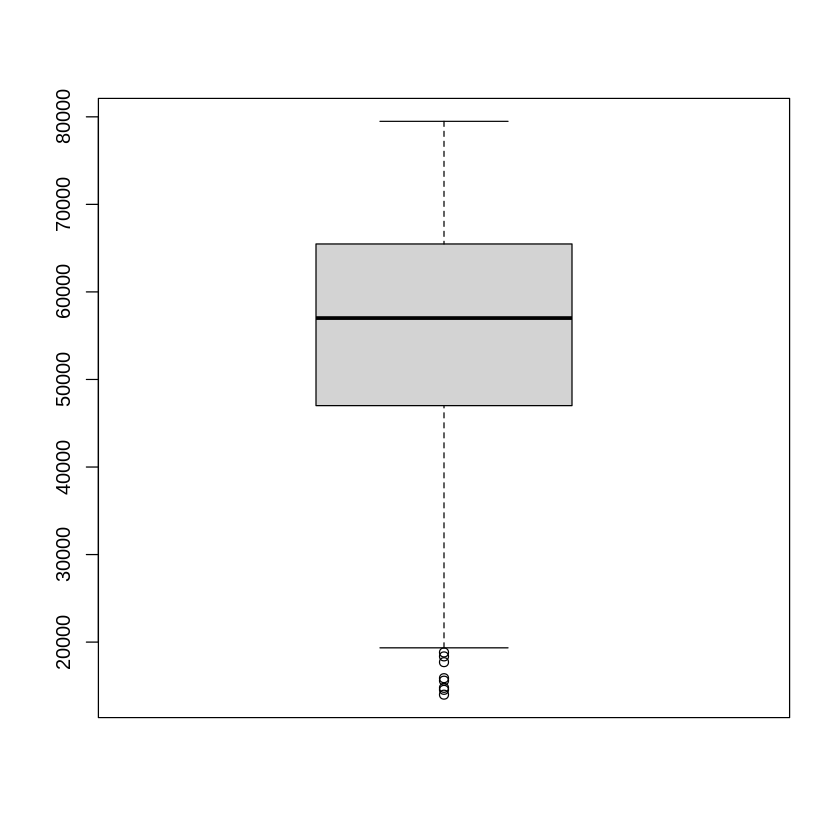

In [13]:
# Checking for outliers

boxplot(`Area Income`)

# Few otliers noted 

In [14]:
# Showing the outliers in area income
boxplot.stats(`Area Income`)$out

[1] 17709.98 18819.34 15598.29 15879.10 14548.06 13996.50 14775.50 18368.57

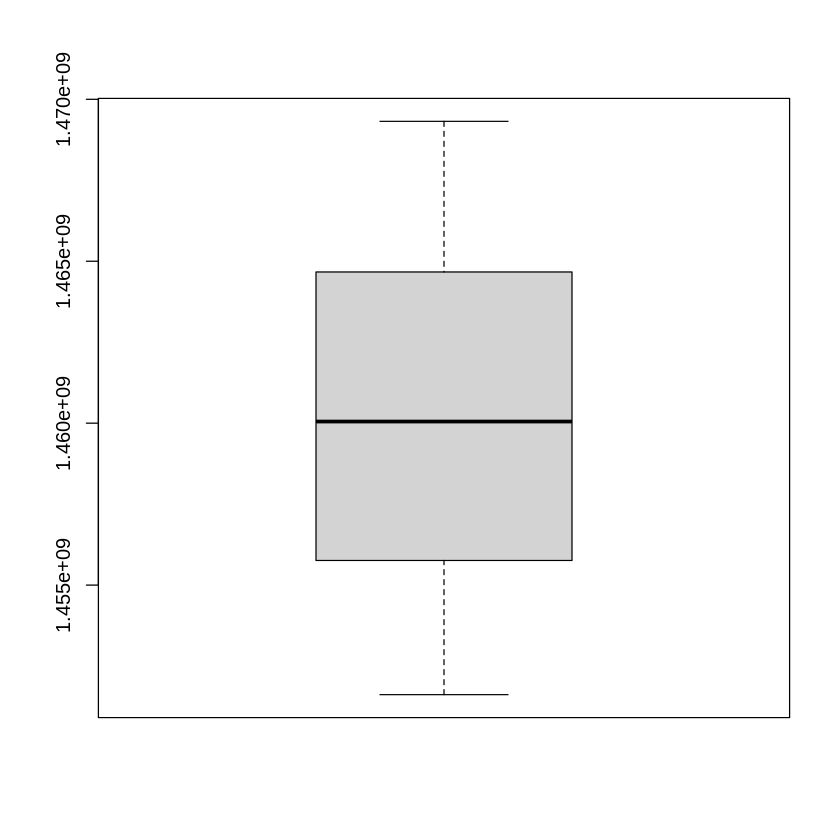

In [15]:
boxplot(Timestamp)
# No outliers on timestamp

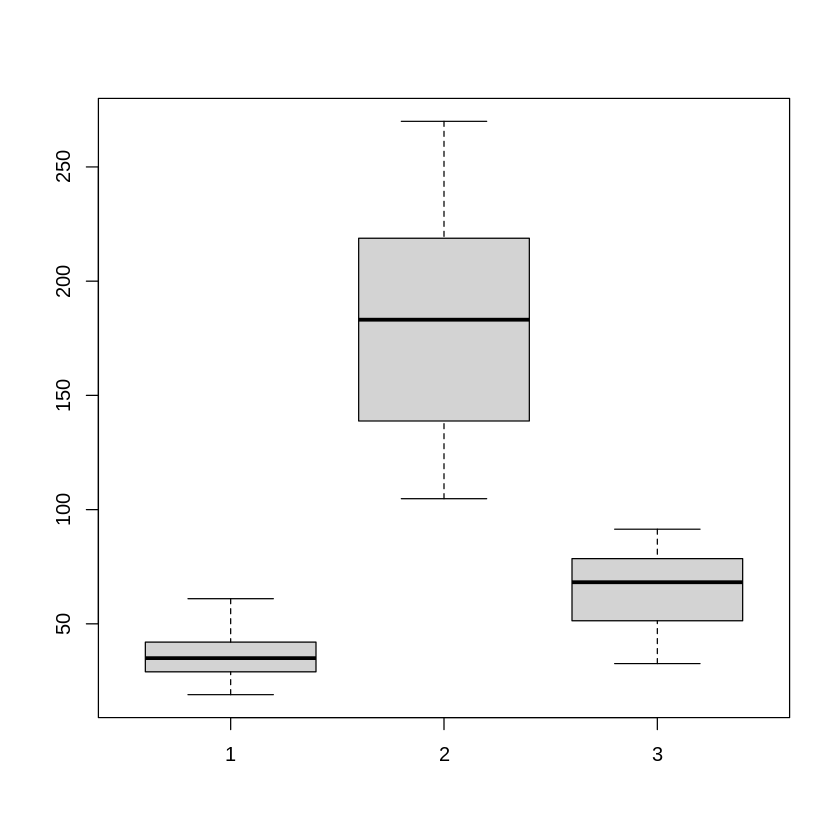

In [16]:
# A boxplot for Age, Daily Internet usage and Daily time spent on site

boxplot(df$Age, df$`Daily Internet Usage`, df$`Daily Time Spent on Site`)

# **EDA**

## Univariate

In [17]:
# Shows the mean, median, minimum, maximum, mode, 1st and 3rd quartile of each numeric column in the dataset
# Measures of centrality are mean, median. 
# Measures of spread are standard deviation, quantiles, min and max, range, interquartile range.

summary(df)

 Daily Time Spent on Site      Age         Area Income    Daily Internet Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Ad Topic Line          City                Male         Country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

In [18]:
# This function provides the ones most useful for scale construction and item analysis in classic psychometrics. 
# Range is most useful for the first pass in a data set, to check for coding errors.

install.packages("psych")
library(psych)
describe(df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Daily Time Spent on Site,1,1000,65.0002,1.585361e+01,68.215,65.74090,17.92463,32.60,91.43,58.83,-0.370645950,-1.0998638,0.50133531
Age,2,1000,36.0090,8.785562e+00,35.000,35.50625,8.89560,19.00,61.00,42.00,0.477705222,-0.4097066,0.27782387
Area Income,3,1000,55000.0001,1.341463e+04,57012.300,56038.93815,13316.62424,13996.50,79484.80,65488.30,-0.648422850,-0.1110924,424.20797488
Daily Internet Usage,4,1000,180.0001,4.390234e+01,183.130,179.98620,58.61459,104.78,269.96,165.18,-0.033436814,-1.2757525,1.38831387
Ad Topic Line*,5,1000,500.5000,2.888194e+02,500.500,500.50000,370.65000,1.00,1000.00,999.00,0.000000000,-1.2036006,9.13327251
City*,6,1000,487.3230,2.793116e+02,485.500,487.51125,356.56530,1.00,969.00,968.00,-0.002957293,-1.1893592,8.83260741
Male,7,1000,0.4810,4.998889e-01,0.000,0.47625,0.00000,0.00,1.00,1.00,0.075940878,-1.9962262,0.01580787
Country*,8,1000,116.4090,6.994214e+01,114.500,115.81875,89.69730,1.00,237.00,236.00,0.076151967,-1.2328105,2.21176482
Timestamp,9,1000,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA


* trimed is the eman after elimination of some rows to calculate the mean and see if the mean will change much i.e. the removed rows to what extent do they affect the true mean
* se is the standard error of the error term

* The skewness and Kurtosis are defined above.
* Daily Time Spent on Site, Area Income, Daily internet usage are negtively skewed, i.e. they are skewed to the left while the other variables / columns are skewed to the right / positively skewed


* The variables of the df object returned by describe() are as follows.
-- n : number of observations excluding missing values
-- na : number of missing values
-- mean : arithmetic average
-- sd : standard devation
-- skewness : skewness
-- kurtosis : kurtosis
-- se: standrd error 

In [19]:
# Variance and standard deviation of the dataset
install.packages("pander")
library(pander)
mpg %>%
    summarize(variable = "Daily Time Spent on Site", Variance = var(`Daily Time Spent on Site`), Standard_Deviation = sd(`Daily Time Spent on Site`)) %>%
    pander
var(`Daily Time Spent on Site`)
sd(`Daily Time Spent on Site`)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘pander’


The following object is masked from ‘package:GGally’:

    wrap






|         variable         | Variance | Standard_Deviation |
|:------------------------:|:--------:|:------------------:|
| Daily Time Spent on Site |  251.3   |       15.85        |



[1] 251.3371

[1] 15.85361

In [20]:
# Variance and standard deviation of the dataset
mpg %>%
    summarize(variable = "Age", Variance = var(Age), Standard_Deviation = sd(Age)) %>%
    pander
var(Age)
sd(Age)



| variable | Variance | Standard_Deviation |
|:--------:|:--------:|:------------------:|
|   Age    |  77.19   |       8.786        |



[1] 77.18611

[1] 8.785562

In [21]:
# Variance and standard deviation of the dataset
mpg %>%
    summarize(variable = "Area Income", Variance = var(`Area Income`), Standard_Deviation = sd(`Area Income`)) %>%
    pander
var(`Area Income`)
sd(`Area Income`)



|  variable   | Variance | Standard_Deviation |
|:-----------:|:--------:|:------------------:|
| Area Income | 1.8e+08  |       13415        |



[1] 179952406

[1] 13414.63

In [22]:
# Variance and standard deviation of the dataset
mpg %>%
    summarize(variable = "Daily Internet Usage", Variance = var(`Daily Internet Usage`), Standard_Deviation = sd(`Daily Internet Usage`)) %>%
    pander
var(`Daily Internet Usage`)



|       variable       | Variance | Standard_Deviation |
|:--------------------:|:--------:|:------------------:|
| Daily Internet Usage |   1927   |        43.9        |



[1] 1927.415

In [23]:
# Variance and standard deviation of the dataset
mpg %>%
    summarize(variable = "Timestamp", Variance = var(Timestamp), Standard_Deviation = sd(Timestamp)) %>%
    pander
var(Timestamp)
sd(Timestamp)



| variable  | Variance  | Standard_Deviation |
|:---------:|:---------:|:------------------:|
| Timestamp | 2.591e+13 |      5089978       |



[1] 2.590788e+13

[1] 5089978

In [24]:
# Variance and standard deviation of the dataset
mpg %>%
    summarize(variable = "Click On Ad", Variance = var(`Clicked on Ad`), Standard_Deviation = sd(`Clicked on Ad`)) %>%
    pander
var(`Clicked on Ad`)
sd(`Clicked on Ad`)



|  variable   | Variance | Standard_Deviation |
|:-----------:|:--------:|:------------------:|
| Click On Ad |  0.2503  |       0.5003       |



[1] 0.2502503

[1] 0.5002502

* The pander function came again on a new line, using the same indentation as summarize.

In [25]:
# A frequency table of Male as a percentage

table(Male) / 1000 * 100

# AT least 51.9% of the data is male while 48.1% are females

Male
   0    1 
51.9 48.1 

In [26]:
# A frequency table of Clicked On Ad as a percentage

table(`Clicked on Ad`) / 1000 * 100

# Theres an equal probability of those who clicked on the add and who didn't click on the add.

Clicked on Ad
 0  1 
50 50 

In [27]:
# A frequency table of age as a percentage

table(Age) / 1000 * 100

# A frequency table of Age 

table(Age)

# 31 was the dominant age with atleast 60 people followed by age 36 which had 50.
# This contributed to 0.060 and 0.050 of the entire count assuming the total count is 1

Age
 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38 
0.6 0.6 0.6 1.3 1.9 2.1 2.7 3.7 3.3 4.8 4.8 3.9 6.0 3.8 4.3 3.9 3.9 5.0 3.6 3.7 
 39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58 
3.0 3.6 3.2 2.6 2.3 2.1 3.0 1.8 1.3 1.6 1.8 2.0 1.2 1.5 1.0 0.9 0.7 0.2 0.6 0.4 
 59  60  61 
0.2 0.4 0.1 

Age
19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 
 6  6  6 13 19 21 27 37 33 48 48 39 60 38 43 39 39 50 36 37 30 36 32 26 23 21 
45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 
30 18 13 16 18 20 12 15 10  9  7  2  6  4  2  4  1 

## Bivariate analysis

In [28]:
# Pearson correlation matrix for the numeric variables
cor(df[,1:4])

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Daily Time Spent on Site,1.0000000,-0.3315133,0.3109544,0.5186585
Age,-0.3315133,1.0000000,-0.1826050,-0.3672086
Area Income,0.3109544,-0.1826050,1.0000000,0.3374955
Daily Internet Usage,0.5186585,-0.3672086,0.3374955,1.0000000


In [29]:
# Spearman correlation matrix for the numeric variables
cor(df[,1:4], method = "spearman")

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Daily Time Spent on Site,1.0000000,-0.3168616,0.2831344,0.5141081
Age,-0.3168616,1.0000000,-0.1359540,-0.3708639
Area Income,0.2831344,-0.1359540,1.0000000,0.3391602
Daily Internet Usage,0.5141081,-0.3708639,0.3391602,1.0000000


In [30]:
# Kendall correlation matrix for the numeric variables
cor(df[,1:4], method = "kendall")

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Daily Time Spent on Site,1.0000000,-0.1966866,0.1657812,0.2932360
Age,-0.1966866,1.0000000,-0.0800581,-0.2324461
Area Income,0.1657812,-0.0800581,1.0000000,0.2083755
Daily Internet Usage,0.2932360,-0.2324461,0.2083755,1.0000000


* Pearson and spearman correlation don't seem to differ much
* They produce nearly similar results if rounder to 1 decimal place

In [31]:
# apply the Pearson's product-moment correlation correlation function 

cor.test(`Daily Time Spent on Site`, `Daily Internet Usage`)
# Produces a variety of results from the p-value, 95% Confidence Interval, the degrees of freedom (df) and also the hypothesis under testing 


	Pearson's product-moment correlation

data:  Daily Time Spent on Site and Daily Internet Usage
t = 19.164, df = 998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4718365 0.5625633
sample estimates:
      cor 
0.5186585 


In [32]:
# A covariance matrix for the numeric variables
cov(df[,1:4])

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Daily Time Spent on Site,251.33709,-46.17415,66130.81,360.9919
Age,-46.17415,77.18611,-21520.93,-141.6348
Area Income,66130.81091,-21520.92580,179952405.95,198762.5315
Daily Internet Usage,360.99188,-141.63482,198762.53,1927.4154


In [33]:
# We convert the clicked on ad variable into a categorical variable
# ---
#  
df$`Clicked on Ad` <- factor(df$`Clicked on Ad`, levels = c(0,1), labels = c("Yes", "No"))

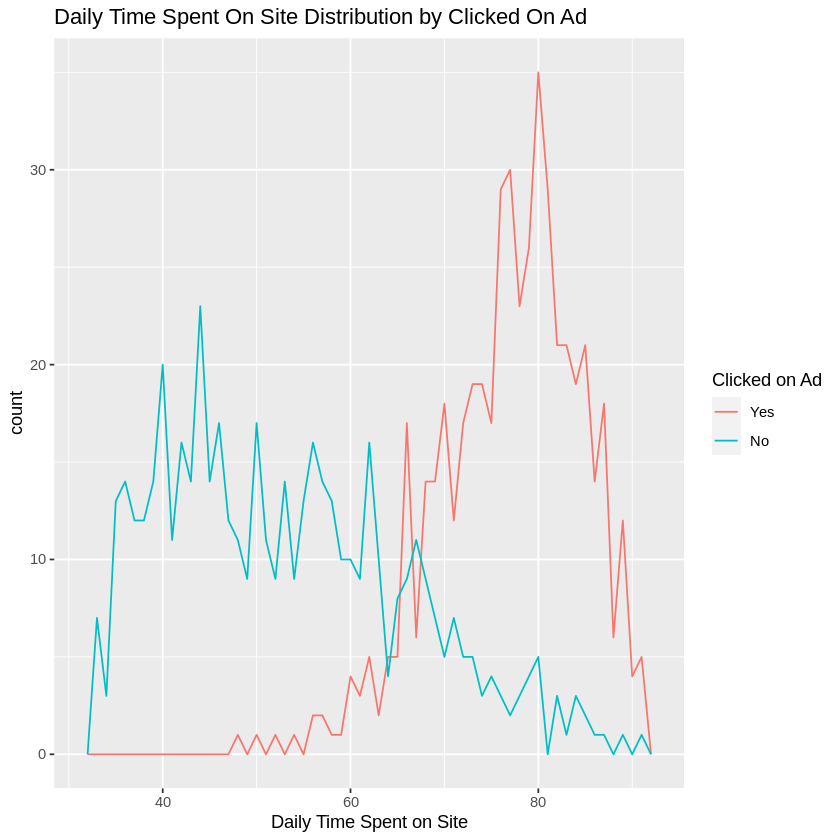

In [34]:
# Creating some visualisations to take a look at each variable
# Visualisation 1
# 
ggplot(df, aes(`Daily Time Spent on Site`, colour = `Clicked on Ad`)) +
geom_freqpoly(binwidth = 1) + labs(title="Daily Time Spent On Site Distribution by Clicked On Ad")

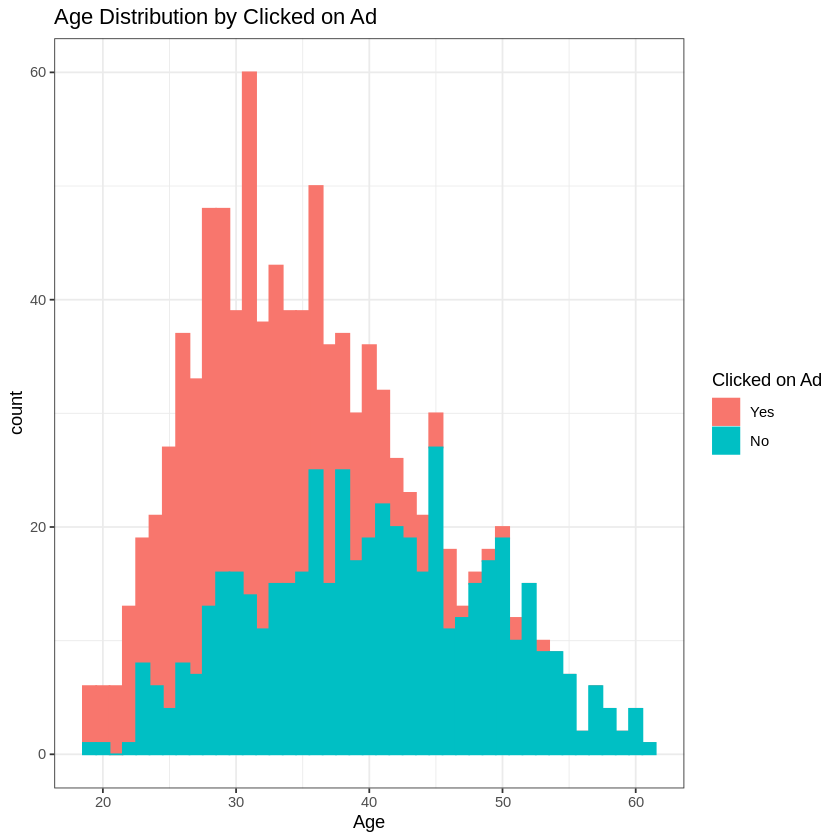

In [35]:
# Visualisation 2
# ---
# 
c <- ggplot(df, aes(x=Age, fill=`Clicked on Ad`, color=`Clicked on Ad`)) +
geom_histogram(binwidth = 1) + labs(title="Age Distribution by Clicked on Ad")
c + theme_bw()

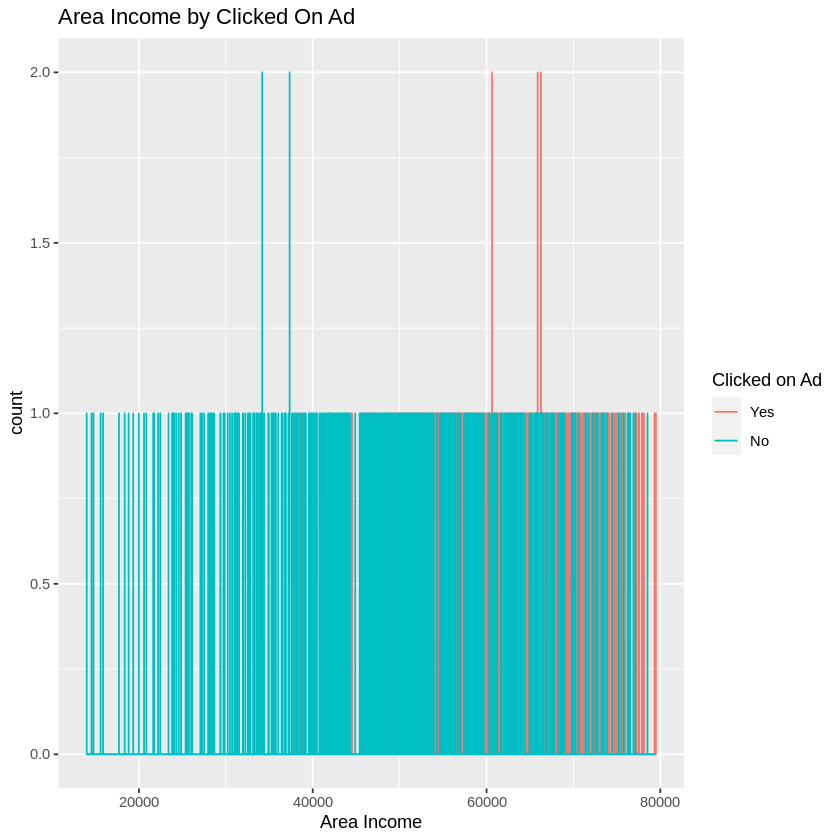

In [36]:
# Visualisation 3
# 
ggplot(df, aes(`Area Income`, colour = `Clicked on Ad`)) +
geom_freqpoly(binwidth = 1) + labs(title="Area Income by Clicked On Ad")

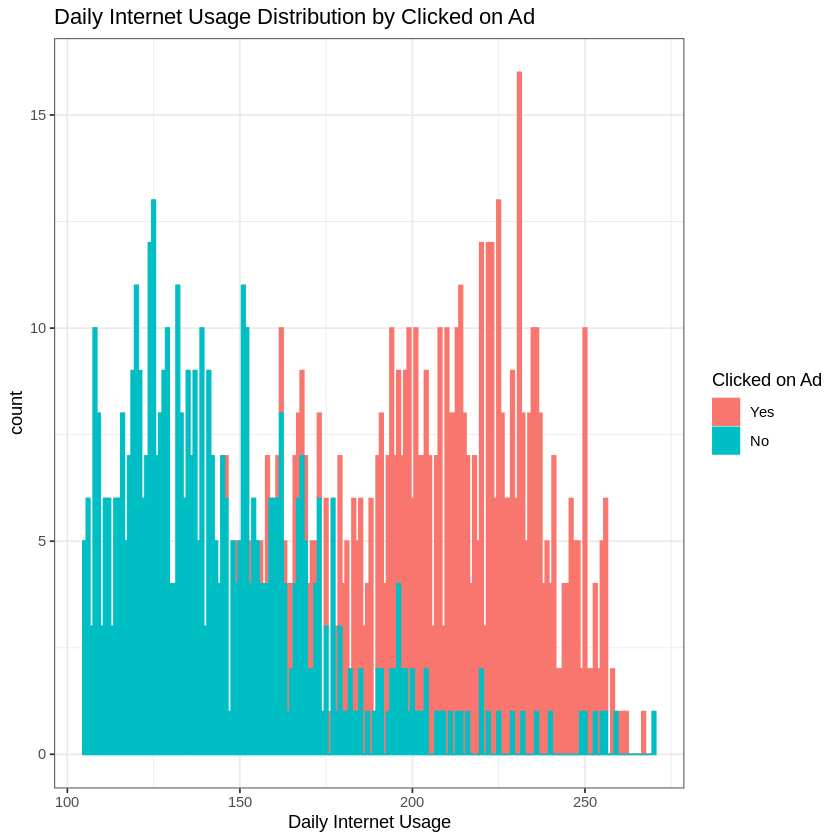

In [37]:
# Visualisation 4
# ---
# 
c <- ggplot(df, aes(x=`Daily Internet Usage`, fill=`Clicked on Ad`, color=`Clicked on Ad`)) +
geom_histogram(binwidth = 1) + labs(title="Daily Internet Usage Distribution by Clicked on Ad")
c + theme_bw()

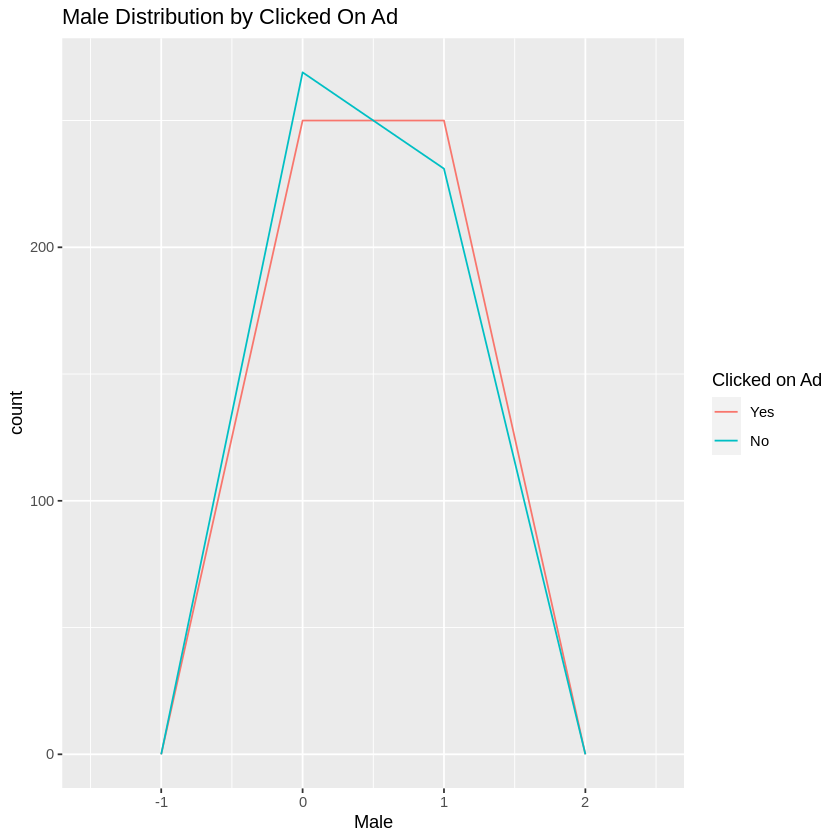

In [38]:
# Visualisation 5
# ---
# 
ggplot(df, aes(Male, colour = `Clicked on Ad`)) +
geom_freqpoly(binwidth = 1) + labs(title="Male Distribution by Clicked On Ad")

The following objects are masked from df (pos = 4):

    Ad Topic Line, Age, Area Income, City, Clicked on Ad, Country,
    Daily Internet Usage, Daily Time Spent on Site, Male, Timestamp


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



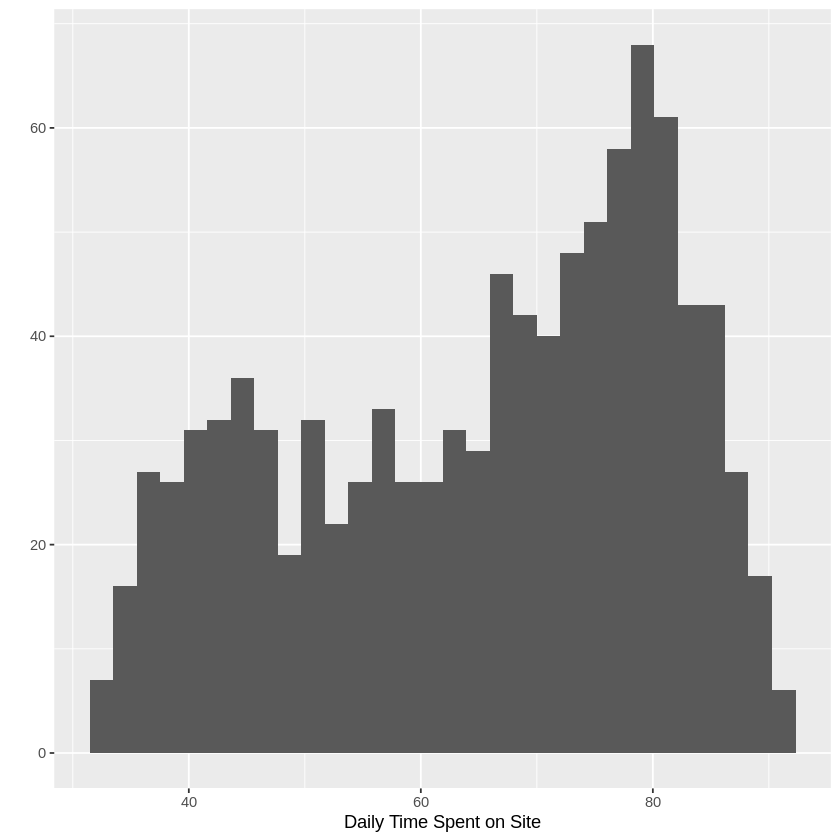

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



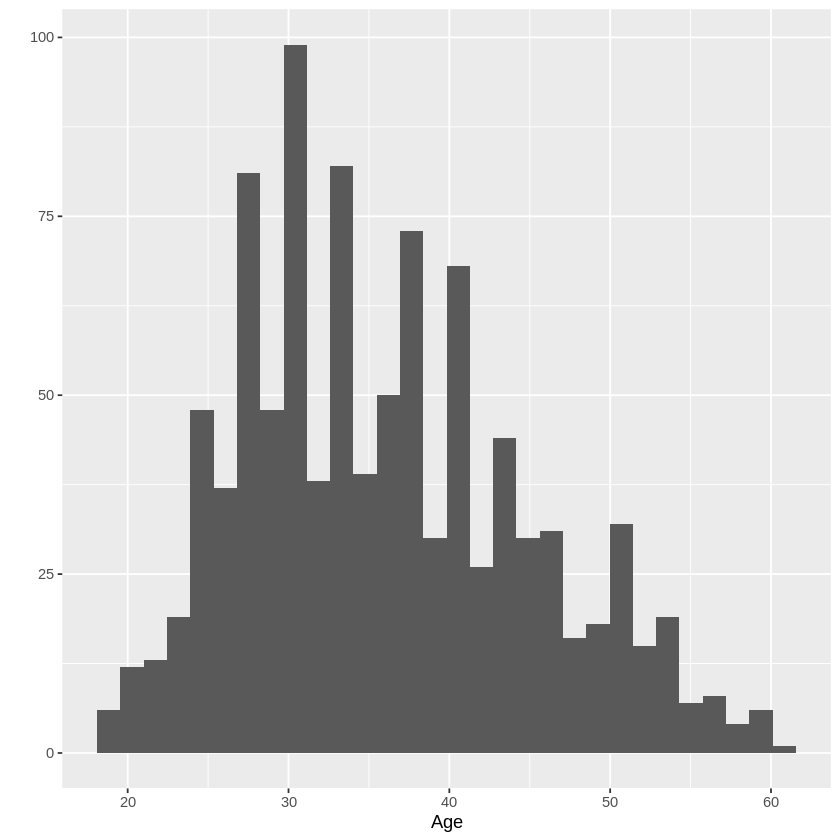

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



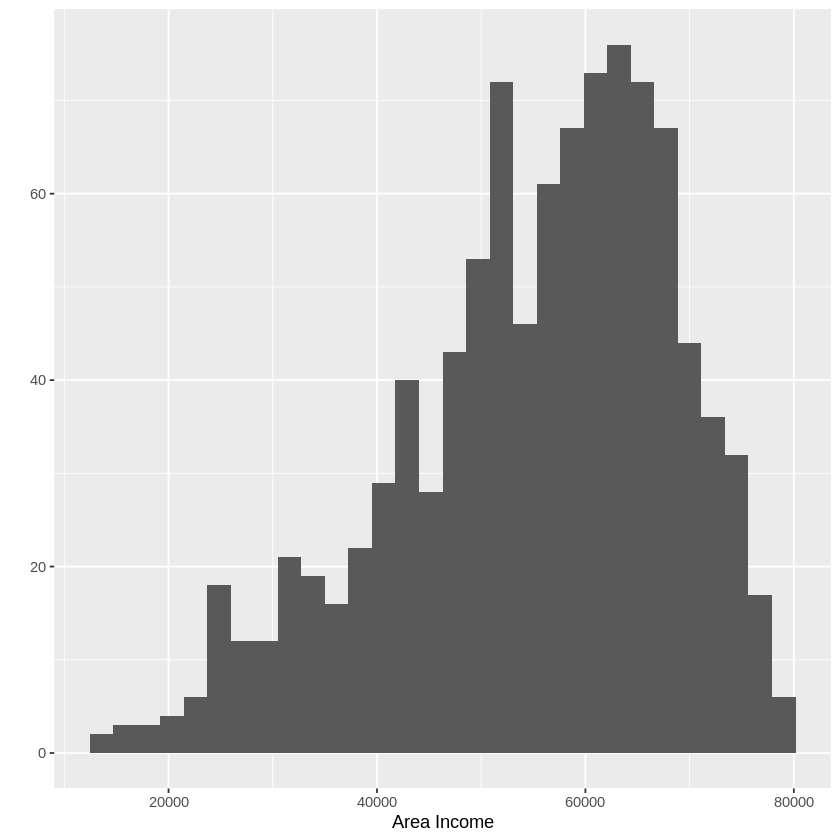

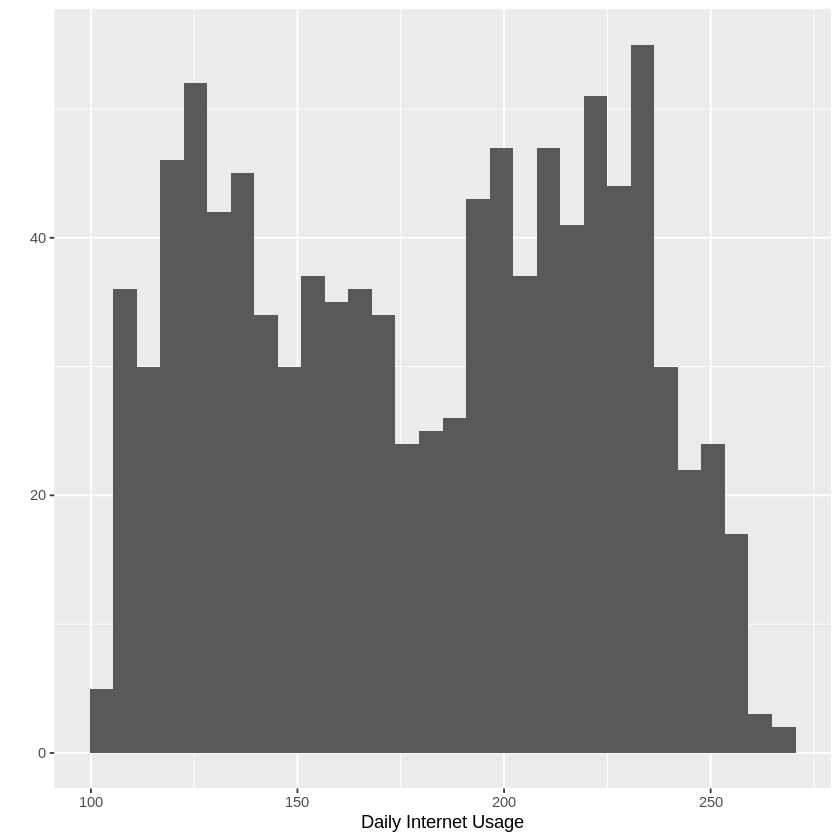

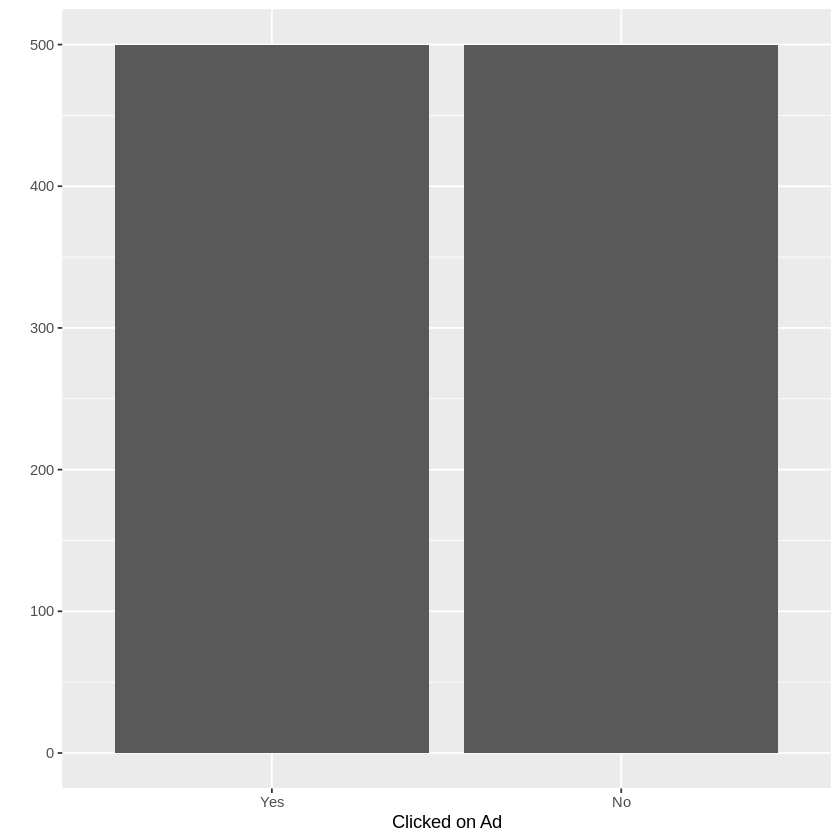

In [39]:
# A qplot of the df dataset

library(ggplot2)

attach(df)
par(mfrow=c(3,1))

qplot(`Daily Time Spent on Site`)
qplot(Age)
qplot(`Area Income`)
qplot(`Daily Internet Usage`)
qplot(`Clicked on Ad`)

The following objects are masked from df (pos = 3):

    Ad Topic Line, Age, Area Income, City, Clicked on Ad, Country,
    Daily Internet Usage, Daily Time Spent on Site, Male, Timestamp


The following objects are masked from df (pos = 5):

    Ad Topic Line, Age, Area Income, City, Clicked on Ad, Country,
    Daily Internet Usage, Daily Time Spent on Site, Male, Timestamp




ERROR: ignored

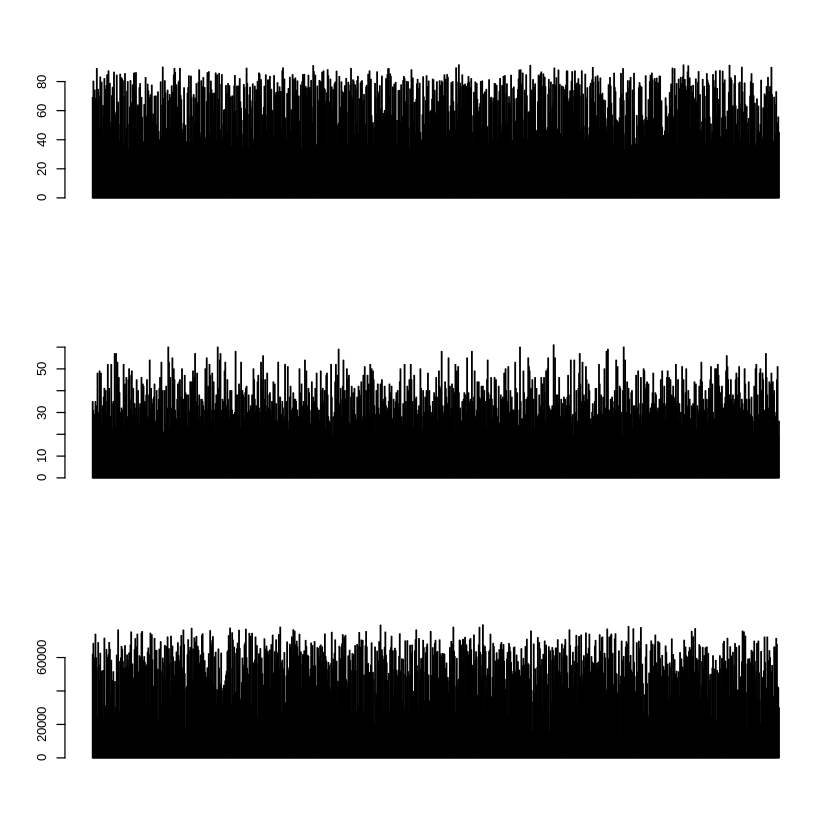

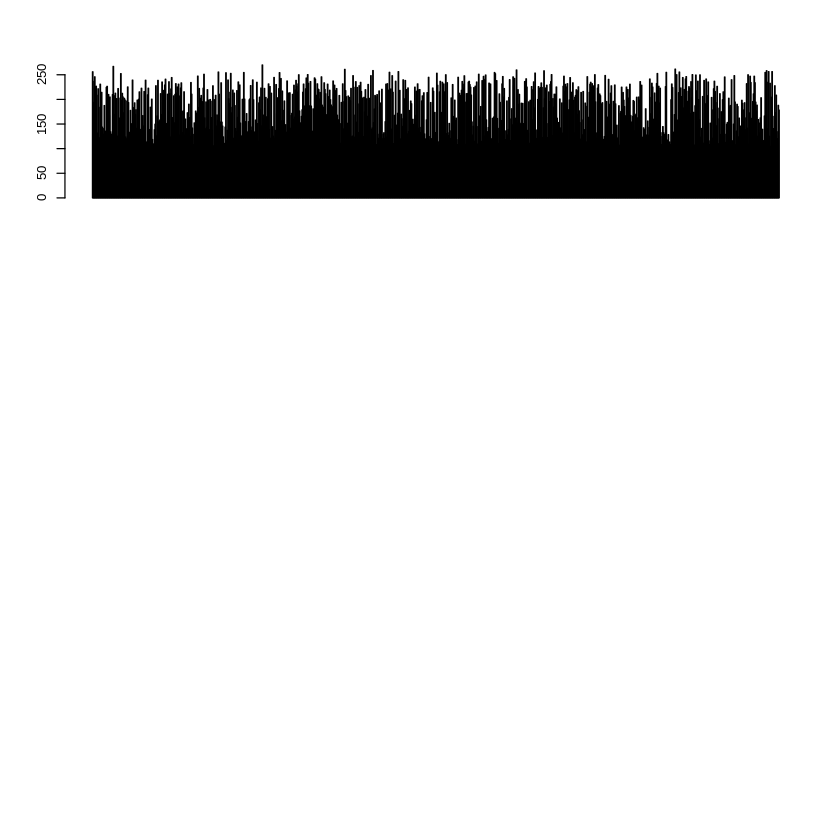

In [40]:
# 3 figures arranged in 3 rows and 1 column
# Combined barplot for the numeric dataset

attach(df)
par(mfrow=c(3,1))
barplot(`Daily Time Spent on Site`)
barplot(Age)
barplot(`Area Income`)
barplot(`Daily Internet Usage`)
barplot(`Clicked on Ad`)

The following objects are masked from df (pos = 3):

    Ad Topic Line, Age, Area Income, City, Clicked on Ad, Country,
    Daily Internet Usage, Daily Time Spent on Site, Male, Timestamp


The following objects are masked from df (pos = 4):

    Ad Topic Line, Age, Area Income, City, Clicked on Ad, Country,
    Daily Internet Usage, Daily Time Spent on Site, Male, Timestamp


The following objects are masked from df (pos = 6):

    Ad Topic Line, Age, Area Income, City, Clicked on Ad, Country,
    Daily Internet Usage, Daily Time Spent on Site, Male, Timestamp




ERROR: ignored

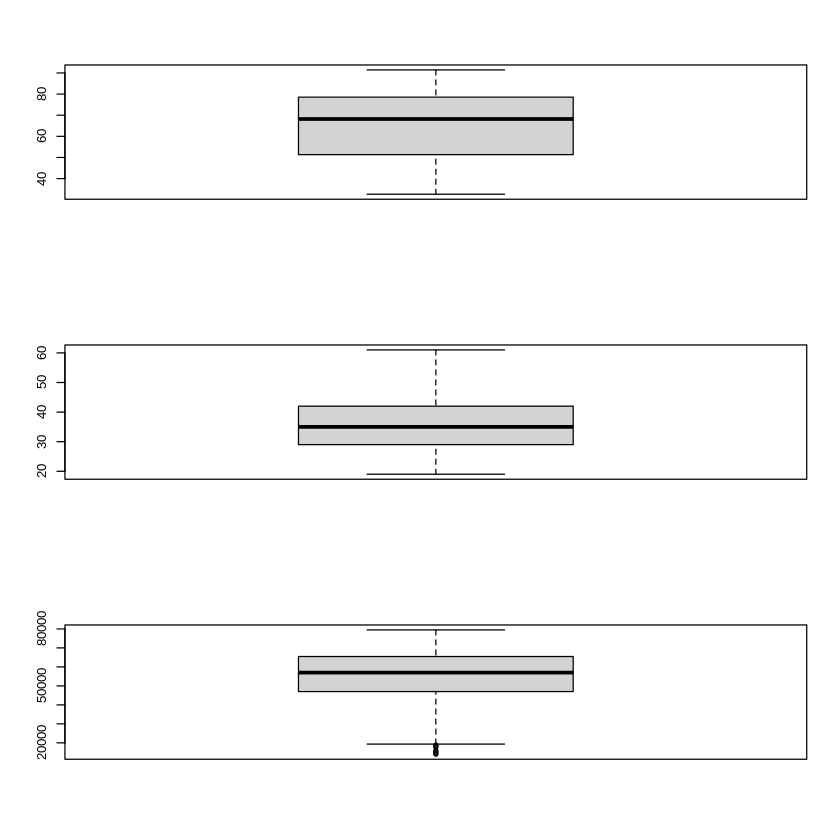

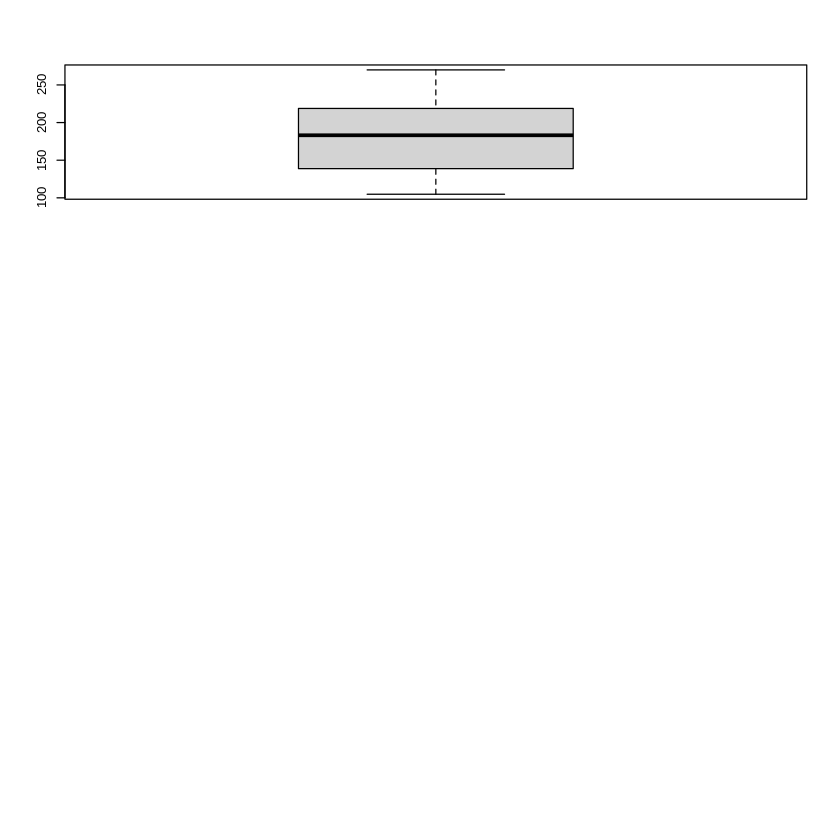

In [41]:
# 3 figures arranged in 3 rows and 1 column
# Combined boxplot for the numeric dataset

attach(df)
par(mfrow=c(3,1))
boxplot(`Daily Time Spent on Site`)
boxplot(Age)
boxplot(`Area Income`)
boxplot(`Daily Internet Usage`)
boxplot(`Clicked on Ad`)

The following objects are masked from df (pos = 3):

    Ad Topic Line, Age, Area Income, City, Clicked on Ad, Country,
    Daily Internet Usage, Daily Time Spent on Site, Male, Timestamp


The following objects are masked from df (pos = 4):

    Ad Topic Line, Age, Area Income, City, Clicked on Ad, Country,
    Daily Internet Usage, Daily Time Spent on Site, Male, Timestamp


The following objects are masked from df (pos = 5):

    Ad Topic Line, Age, Area Income, City, Clicked on Ad, Country,
    Daily Internet Usage, Daily Time Spent on Site, Male, Timestamp


The following objects are masked from df (pos = 7):

    Ad Topic Line, Age, Area Income, City, Clicked on Ad, Country,
    Daily Internet Usage, Daily Time Spent on Site, Male, Timestamp




ERROR: ignored

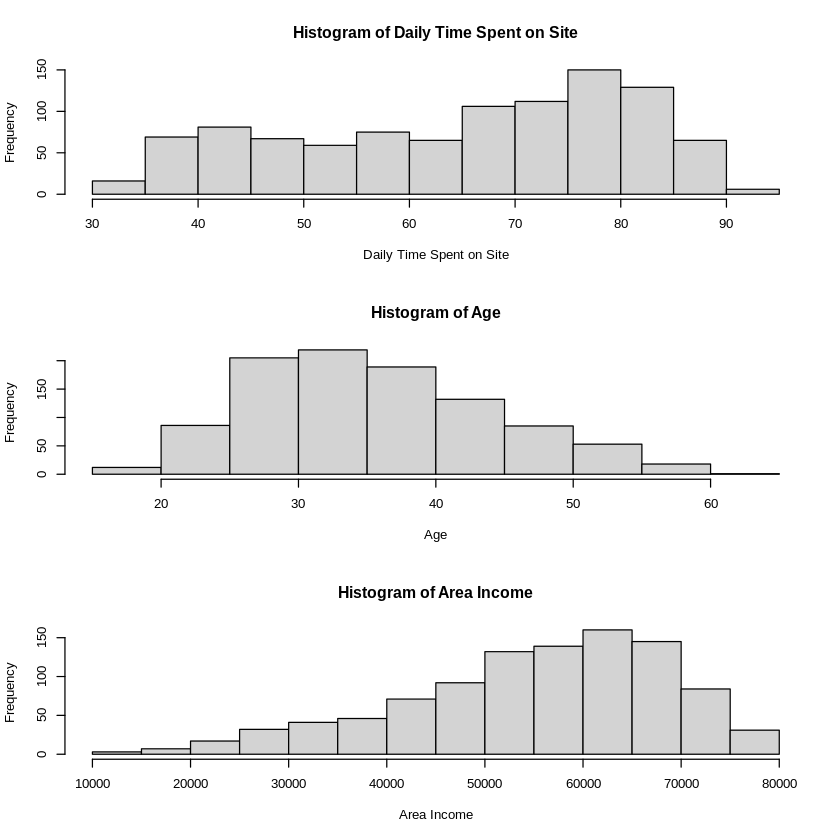

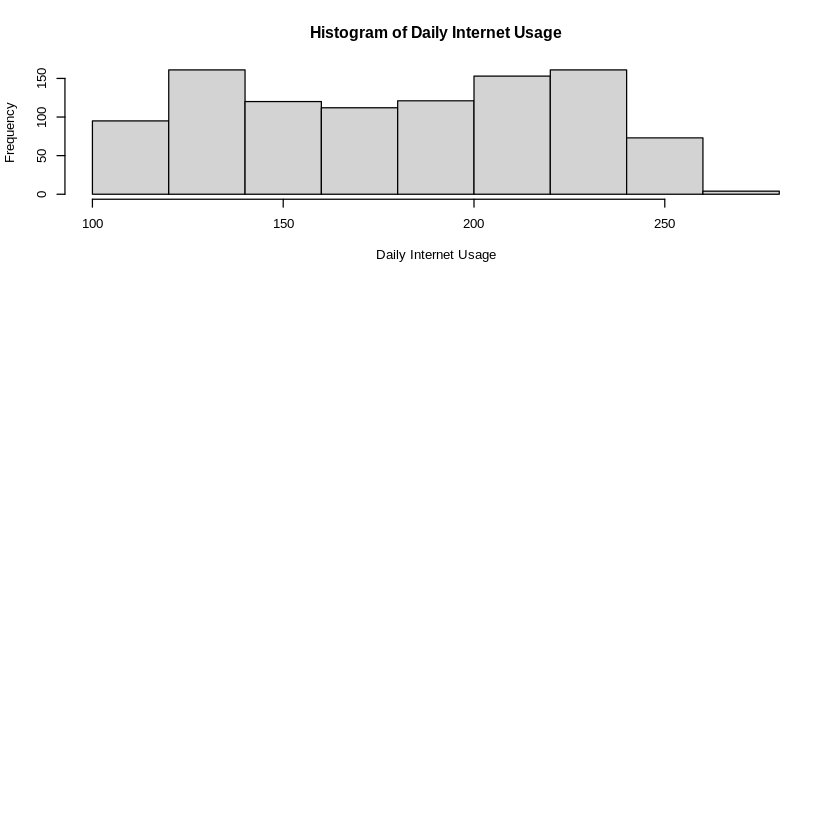

In [42]:
# 3 figures arranged in 3 rows and 1 column
attach(df)
par(mfrow=c(3,1))
hist(`Daily Time Spent on Site`)
hist(Age)
hist(`Area Income`)
hist(`Daily Internet Usage`)
hist(`Clicked on Ad`)

# **Implementing the solution**

## **Without the categorical columns**

In [43]:
head(df)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<fct>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,Yes
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,Yes
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,Yes
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,Yes
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,Yes
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,Yes


In [44]:
# remove Categorical variables
dat <- df %>%
  select(-Country, -City, -("Ad Topic Line"), -("Timestamp"))

# display 5 first obs. of new dataset
head(dat, 5)


Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
68.95,35,61833.90,256.09,0,Yes
80.23,31,68441.85,193.77,1,Yes
69.47,26,59785.94,236.50,0,Yes
74.15,29,54806.18,245.89,1,Yes
68.37,35,73889.99,225.58,0,Yes


In [45]:
# For visualization of corr purpose only
data <- dat %>%
  select(-("Clicked on Ad"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



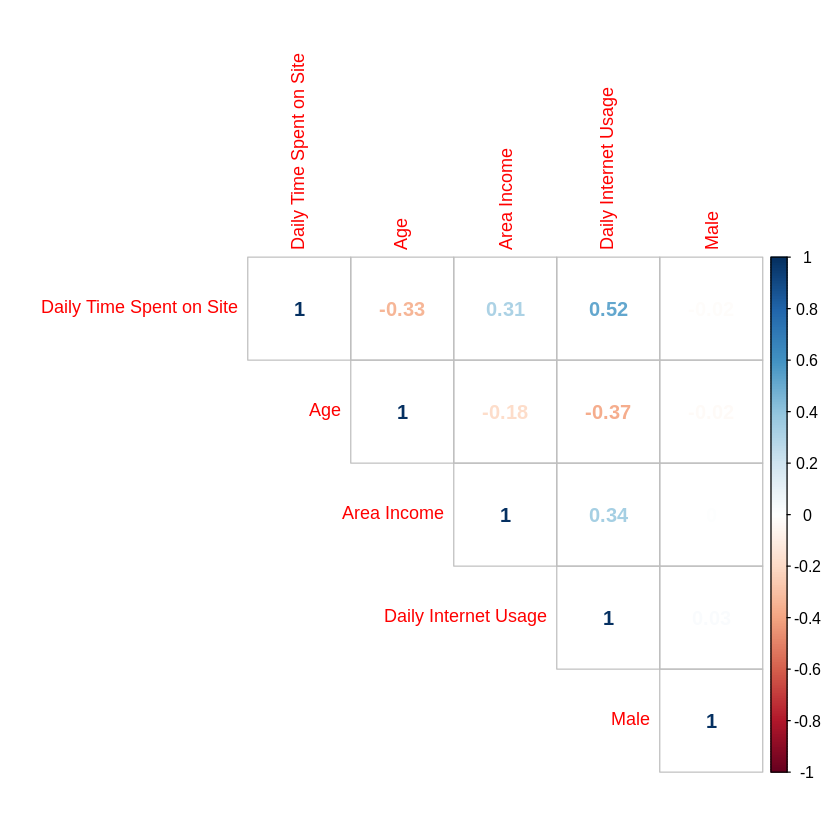

In [46]:
# improved correlation matrix
install.packages("corrplot")
library(corrplot)

corrplot(cor(data), type = 'upper', method = 'number', tl.cex = 0.9)

# No positive or negative strong Correlation between the numerical variables

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



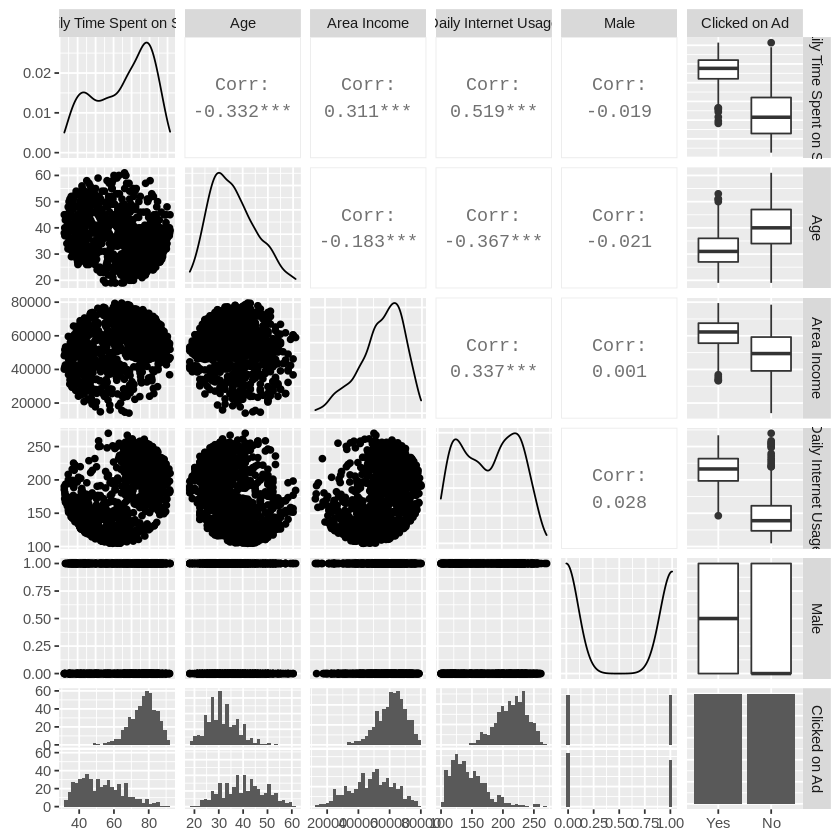

In [47]:
# Visualisation 1
# ---
# 
ggpairs(dat)

In [48]:
# Reading the first 6 rows of the iris dataset

dim(dat)
head(dat)

[1] 1000    6

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
68.95,35,61833.90,256.09,0,Yes
80.23,31,68441.85,193.77,1,Yes
69.47,26,59785.94,236.50,0,Yes
74.15,29,54806.18,245.89,1,Yes
68.37,35,73889.99,225.58,0,Yes
59.99,23,59761.56,226.74,1,Yes


## Linear Models

In [49]:
# Applying the lm() function.

multiple_lm <- lm(`Clicked on Ad` ~ ., dat)
multiple_lm

Warning message in model.response(mf, "numeric"):
“using type = "numeric" with a factor response will be ignored”
Warning message in Ops.factor(y, z$residuals):
“‘-’ not meaningful for factors”



Call:
lm(formula = `Clicked on Ad` ~ ., data = dat)

Coefficients:
               (Intercept)  `Daily Time Spent on Site`  
                 3.309e+00                  -1.279e-02  
                       Age               `Area Income`  
                 8.983e-03                  -6.173e-06  
    `Daily Internet Usage`                        Male  
                -5.260e-03                  -2.926e-02  


In [50]:
# Generating the anova table
# anova(multiple_lm)
# which predictor variables are significant, you can examine the coefficients table, 
# which shows the estimate of regression beta coefficients and the associated t-statitic p-values

summary(multiple_lm)$coefficient

Warning message in Ops.factor(r, 2):
“‘^’ not meaningful for factors”


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.308568e+00,NA,NA,NA
`Daily Time Spent on Site`,-1.279453e-02,NA,NA,NA
Age,8.982714e-03,NA,NA,NA
`Area Income`,-6.172802e-06,NA,NA,NA
`Daily Internet Usage`,-5.259994e-03,NA,NA,NA
Male,-2.926290e-02,NA,NA,NA


In [51]:
# The significant variables

sig_lm <- lm(`Clicked on Ad` ~ Age, data = dat)
sig_lm

Warning message in model.response(mf, "numeric"):
“using type = "numeric" with a factor response will be ignored”
Warning message in Ops.factor(y, z$residuals):
“‘-’ not meaningful for factors”



Call:
lm(formula = `Clicked on Ad` ~ Age, data = dat)

Coefficients:
(Intercept)          Age  
    0.49014      0.02804  


* Our model equation is Clicked on Add = -0.50986 + 0.02804*Age

In [52]:
# RSE estimate gives a measure of error of prediction
# The error rate can be estimated by dividing the RSE by the mean outcome variable

sigma(sig_lm)/mean(dat$`Clicked on Ad`)

Warning message in Ops.factor(weighted.residuals(object), 2):
“‘^’ not meaningful for factors”
Warning message in mean.default(dat$`Clicked on Ad`):
“argument is not numeric or logical: returning NA”


[1] NA

In [53]:
# The confidence interval of the model coefficient can be extracted as follow:

confint(sig_lm)

Warning message in Ops.factor(r, 2):
“‘^’ not meaningful for factors”


,2.5 %,97.5 %
(Intercept),NA,NA
Age,NA,NA


## KNN

In [54]:
# Fetting a summary of our dataset

summary(dat)

 Daily Time Spent on Site      Age         Area Income    Daily Internet Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
      Male       Clicked on Ad
 Min.   :0.000   Yes:500      
 1st Qu.:0.000   No :500      
 Median :0.000                
 Mean   :0.481                
 3rd Qu.:1.000                
 Max.   :1.000                

In [55]:
# Storing it as data frame
dia <- data.frame(dat)

In [56]:
# Creating a random number equal 90% of total number of rows
ran <- sample(1:nrow(dia),0.9 * nrow(dia))

# The normalization function is created
nor <-function(x) { (x -min(x))/(max(x)-min(x))   }

In [57]:
# Normalization function is applied to the dataframe
dia_nor <- as.data.frame(lapply(dia[,c(1,2,3,4,5)], nor))

In [58]:
# The training dataset extracted
dia_train <- dia_nor[ran,]

# The test dataset extracted
dia_test <- dia_nor[-ran,]

In [59]:
# The 6th column of training dataset because that is what we need to predict about testing dataset
# also convert ordered factor to normal factor
dia_target <- as.factor(dia[ran,6])

In [60]:
# The actual values of 6th column of testing dataset to compaire it with values that will be predicted
# also convert ordered factor to normal factor
test_target <- as.factor(dia[-ran,6])

In [61]:
# Running the knn function
library(class)
pr <- knn(dia_train,dia_test,cl=dia_target,k=20)

In [62]:
# Creating the confucion matrix
tb <- table(pr,test_target)
tb

     test_target
pr    Yes No
  Yes  54  3
  No    3 40

In [63]:
# Checking the accuracy
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tb)

[1] 94

In [64]:
# Test accuracy rate
sum(diag(tb)/sum(tb))

# Test error rate
1 - sum(diag(tb)/sum(tb))

# As you may notice, test accuracy rate + test error rate = 1, and I’m providing multiple ways of calculating each value.

[1] 0.94

[1] 0.06

* Our model has archieved a 94% accuracy score
* we have n error of 5.999%

## Decision Tree

In [65]:
# Load the party package. It will automatically load other

install.packages("party")
library(party)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TH.data’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’


Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich


Attaching package: ‘strucchange’


The following object is masked from ‘package:stringr’:

    boundary




In [66]:
# Creating the input data frame.
input.dat <- dat[c(1:905),]

In [67]:
# Creating the tree.
  output.tree <- ctree(
  `Clicked on Ad`~ `Daily Time Spent on Site` + Age + `Area Income` + `Daily Internet Usage` + Male, 
  data = input.dat)

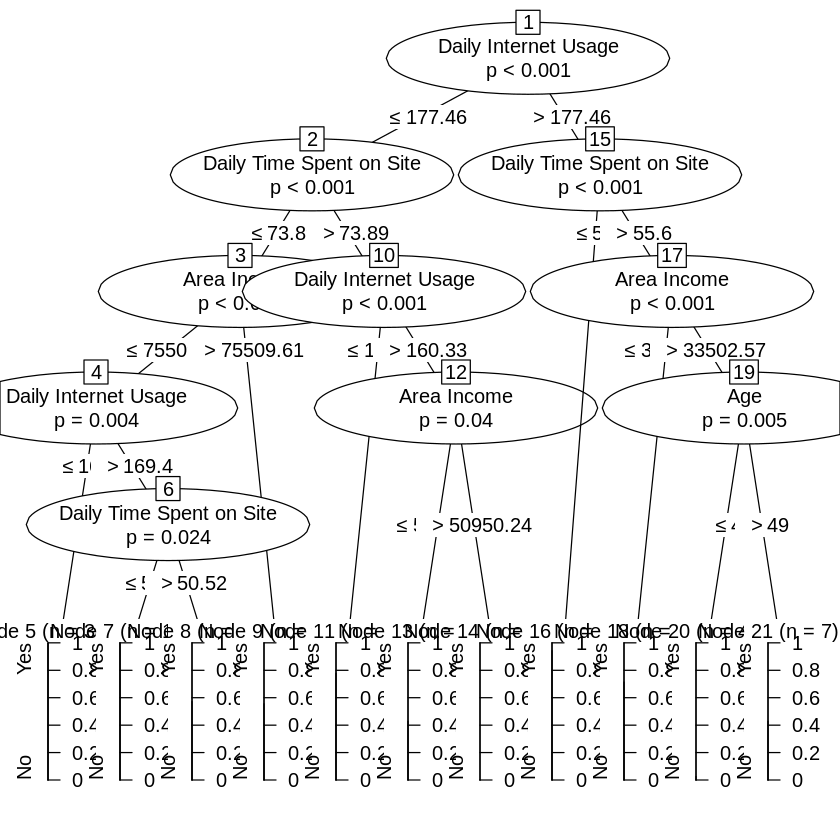

In [68]:
# Plotting the tree.
plot(output.tree)

## SVM

In [69]:
# We first install the caret package. 
# This package will be very helfpul in providing us with 
# direct access to various functions for training our model
# with various machine learning algorithms such 
# as KNN, SVM, Decision Tree, Linear Regression etc.
# ---
# 
install.packages('caret')
library(caret)

install.packages("kernlab")
library(kernlab)

install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘kernlab’


The following object is masked from ‘package:modeltools’:

    prior


The following object is masked from ‘package:psych’:

    alpha


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:ggplot2’:

    alpha


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [70]:
# Next we split the data into training set and testing set. 
# NB: The training set will be used for model building while the testing set for model evaluation.
# ---
# - The “y” parameter takes the value of variable according to which data needs to be partitioned. 
# In our case, target variable is at Clicked on Ad, so we are passing dat$`Clicked on Ad`
# - The “p” parameter holds a decimal value in the range of 0-1. It’s to show the percentage of the split. 
# We are using p=0.7. It means that data split should be done in 70:30 ratio. 
# So, 70% of the data is used for training and the remaining 30% is for testing the model.
# - The “list” parameter is for whether to return a list or matrix. 
# We are passing FALSE for not returning a list
# ---
# 
intrain <- createDataPartition(y = dat$`Clicked on Ad`, p= 0.7, list = FALSE)
training <- dat[intrain,]
testing <- dat[-intrain,]

Warning message:
“The `i` argument of ``[`()` can't be a matrix as of tibble 3.0.0.
Convert to a vector.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [71]:
# We check the dimensions of out training dataframe and testing dataframe
# ---
# 
dim(training); 
dim(testing);

[1] 700   6

[1] 300   6

In [72]:
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

svm_Linear <- train(`Clicked on Ad` ~., data = training, method = "svmLinear",
trControl=trctrl,
preProcess = c("center", "scale"),
tuneLength = 10)

In [73]:
# We can then check the reult of our train() model as shown below
# ---
# 
svm_Linear

Support Vector Machines with Linear Kernel 

700 samples
  5 predictor
  2 classes: 'Yes', 'No' 

Pre-processing: centered (5), scaled (5) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 630, 630, 630, 630, 630, 630, ... 
Resampling results:

  Accuracy   Kappa    
  0.9685714  0.9371429

Tuning parameter 'C' was held constant at a value of 1

* We have a 96.86% accuracy score 
* Te diagonal sum / Cohen's kappa is the diagonal sum of the (possibly weighted) relative frequencies, corrected for expected values and standardized by its maximum value. And it has an accuracy of 93.71%

In [74]:
# We can use the predict() method for predicting results as shown below. 
# We pass 2 arguements, our trained model and our testing data frame.
# ---
# 
test_pred <- predict(svm_Linear, newdata = testing)
test_pred

[1] Yes Yes Yes No  No  No  Yes No  Yes Yes Yes No  Yes No  Yes Yes No  Yes
 [19] No  No  No  Yes No  Yes No  No  Yes No  No  No  No  Yes No  Yes No  Yes
 [37] Yes Yes Yes No  No  No  No  Yes No  Yes No  Yes No  No  No  Yes Yes Yes
 [55] No  No  Yes Yes Yes No  Yes No  No  No  No  Yes Yes Yes Yes No  Yes Yes
 [73] No  Yes No  No  Yes Yes No  No  No  Yes Yes No  Yes Yes No  Yes No  No 
 [91] No  Yes Yes Yes Yes No  Yes Yes No  Yes Yes No  No  No  Yes Yes Yes Yes
[109] No  Yes Yes Yes Yes Yes No  Yes Yes Yes No  No  Yes No  Yes No  Yes Yes
[127] No  Yes No  No  No  Yes Yes No  Yes Yes No  No  No  Yes Yes No  Yes No 
[145] Yes No  No  Yes No  Yes No  No  Yes No  Yes Yes Yes No  No  Yes Yes Yes
[163] Yes No  Yes Yes No  No  Yes No  No  Yes Yes No  Yes Yes No  No  No  Yes
[181] No  Yes No  Yes No  Yes Yes Yes No  No  Yes No  No  No  Yes Yes Yes No 
[199] Yes Yes Yes No  Yes Yes Yes No  Yes Yes Yes Yes Yes Yes No  Yes No  No 
[217] Yes Yes Yes Yes Yes Yes No  Yes Yes Yes No  Yes Yes Yes No  No  Yes No 
[235] No  No  No  Yes No  No  No  No  No  No  No  Yes Yes No  No  No  Yes Yes
[253] Yes No  No  No  Yes No  Yes Yes No  No  No  Yes Yes Yes No  Yes Yes No 
[271] No  Yes No  No  Yes No  No  No  No  Yes Yes Yes No  No  No  No  No  Yes
[289] Yes No  No  No  No  Yes Yes No  No  Yes No  No 
Levels: Yes No

In [75]:
# Now checking for our accuracy of our model by using a confusion matrix 
# ---
# 
confusionMatrix(table(test_pred, testing$`Clicked on Ad`))

Confusion Matrix and Statistics

         
test_pred Yes  No
      Yes 147   7
      No    3 143
                                          
               Accuracy : 0.9667          
                 95% CI : (0.9396, 0.9839)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9333          
                                          
 Mcnemar's Test P-Value : 0.3428          
                                          
            Sensitivity : 0.9800          
            Specificity : 0.9533          
         Pos Pred Value : 0.9545          
         Neg Pred Value : 0.9795          
             Prevalence : 0.5000          
         Detection Rate : 0.4900          
   Detection Prevalence : 0.5133          
      Balanced Accuracy : 0.9667          
                                          
       'Positive' Class : Yes             
                                          

* Overall accuracy is 96.67%

## Naive Bayes

### Naive bayes with e1071 package

In [76]:
# Splitting data into training and test data sets
# ---
# 
indxTrain <- createDataPartition(y = dat$`Clicked on Ad`,p = 0.7,list = FALSE)
training <- dat[indxTrain,]
testing <- dat[-indxTrain,] 
 

In [77]:
# Checking dimensions of the split
# ---
#
prop.table(table(dat$`Clicked on Ad`)) * 100
prop.table(table(training$`Clicked on Ad`)) * 100
prop.table(table(testing$`Clicked on Ad`)) * 100


Yes  No 
 50  50 


Yes  No 
 50  50 


Yes  No 
 50  50 

In [78]:
# Comparing the outcome of the training and testing phase
# ---
# Creating objects x which holds the predictor variables and y which holds the response variables
# ---
#
x = training[,-6]
y = training$`Clicked on Ad`

In [79]:
# Loading our inbuilt e1071 package that holds the Naive Bayes function.
# ---
# 
install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [80]:
# Naive bayes receives contigency table

model <- naiveBayes(`Clicked on Ad` ~ ., data = dat)
model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
Yes  No 
0.5 0.5 

Conditional probabilities:
     Daily Time Spent on Site
Y         [,1]      [,2]
  Yes 76.85462  7.560031
  No  53.14578 12.822091

     Age
Y       [,1]     [,2]
  Yes 31.684 6.212998
  No  40.334 8.856598

     Area Income
Y         [,1]     [,2]
  Yes 61385.59  8904.06
  No  48614.41 14116.24

     Daily Internet Usage
Y         [,1]     [,2]
  Yes 214.5137 23.87438
  No  145.4865 30.02583

     Male
Y      [,1]      [,2]
  Yes 0.500 0.5005008
  No  0.462 0.4990532


* The a-priori probabilities are the prior probability in Bayes theorem. Its the frequency each level of class occurs in the training dataset.

In [81]:
predict(model, dat[sample(1:1000, 6, replace = FALSE),])

[1] Yes No  No  Yes Yes No 
Levels: Yes No

In [82]:
predict(model, dat[sample(1:1000, 6, replace = FALSE),], type = "raw")

Yes,No
0.99919865,0.0008013527
0.99970563,0.0002943733
0.99965333,0.0003466675
0.97560887,0.0243911315
0.01369833,0.9863016662
0.99617773,0.0038222719


### Naive bayes with Caret package

In [84]:
install.packages('caret')
library(caret)

install.packages('caretEnsemble')
library(caretEnsemble)

install.packages('klaR')
library(klaR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbapply’, ‘gridExtra’



Attaching package: ‘caretEnsemble’


The following object is masked from ‘package:ggplot2’:

    autoplot


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘R.cache’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘combinat’, ‘questionr’


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [87]:
# Splitting data into training and test data sets
# ---
# 
indxTrain <- createDataPartition(y = dat$`Clicked on Ad`,p = 0.7,list = FALSE)
training <- dat[indxTrain,]
testing <- dat[-indxTrain,] 

In [88]:
# The dataframe dat should be split inro the predictor dataframe and the outcome vector. 
x = training[,-6]
y = training$`Clicked on Ad`

In [89]:
# Now building our model 
# The model is trained using the train function
# 
modell <- train(x,y,trControl=trainControl(method='cv',number=10))
modell

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a

Random Forest 

700 samples
  5 predictor
  2 classes: 'Yes', 'No' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 630, 630, 630, 630, 630, 630, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9642857  0.9285714
  3     0.9657143  0.9314286
  5     0.9571429  0.9142857

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.

* Below is an alternative method 

In [90]:
# set up 10-fold cross validation procedure
train_control <- trainControl(
  method = "cv", 
  number = 10
  )
  
# train model
nb.m1 <- train(
  x = x,
  y = y,
  #method = "nb",
  trControl = train_control
  )

# This one line will generate a Naive Bayes model, using 10-fold cross-validation. 
# From above, x is the attributes and y is the labels. 
# The ‘nb’ tells the trainer to use Naive Bayes. 
# The trainController part tells the trainer to use cross-validataion (‘cv’) with 10 folds.

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a

In [91]:
# results
confusionMatrix(nb.m1)

Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction  Yes   No
       Yes 48.1  1.9
       No   1.9 48.1
                            
 Accuracy (average) : 0.9629


# **Conclusion**

* As observed there's a 51.9% chance that males will visit her site and a 48.1% chance that females will do so
* People in teh following countries are more likely to see and visit her site Czech Republic, France had 9 searches while those in Senegal, Afghanistan, Cyprus, Greece, Liberia, Peru, South AFrica, Turkey had 8 searches. 
* Most of the people who visit her site are of the ages of 31 and 36 with a count of 60 and 50 respectively
* There's an equal chance of those who clicked on the add and who didn't with a probability of 0.5 for both cases.

* A product should be created to encourage the viewership in countries like Andorra, Argentina had 2 searches and Ruba, Bermuda,  had 1 search